# LSH

In [ ]:
p3_address = './P3/dataset.txt'

Load your Dataset

In [ ]:
documents = open(p3_address).readlines()

In [ ]:
documents = [x[:-1] for x in documents]
documents

['university of AmirKabir',
 'The quick brown fox jumps over the lazy dog.',
 'The lazy dog is jumped over by a quick brown fox.',
 'A fox that is brown in color jumps over a dog that is lazy.',
 'A lazy dog has a quick brown fox jumping over it.',
 'The quick brown fox leaps over the dog that is lazy.',
 'A brown-colored fox jumps over a dog that is lazy.',
 'The dog that is lazy is leapt over by a fox that is quick and brown.',
 'The quick and brown fox jumps over the dog that is not very active.',
 'A quick and brown-colored fox jumps over a dog that is lethargic.',
 'The lazy dog has a quick and brown fox that jumps over it.',
 'The fox that is brown in color jumps over the lazy dog.',
 'A brown-colored fox jumps over a dog that is not very active.',
 'A quick brown fox is seen jumping over a lazy dog.',
 'The dog that is lazy has a quick and brown fox jumping over it.',
 'A quick and brown fox jumps over the dog that is not very energetic.',
 'The lazy dog has a fox that is quick 

In [ ]:
num_minhash = 20
band_size = 10
K = 5

shingled example of "university of AmirKabir" with K = 2

un, ni, iv, ve, er, rs, si, it, ty, y , o, of, f , A, Am, mi, ir, rK, Ka, ab, bi, ir

In [ ]:
def create_shingle(docs: str, k: int):
    """
    :param docs: Entire documents list
    :param k: Shingle size
    :return: A set of k-shingles
    """
    shingle_set = []
    #TODO-Task1: start your code
    for doc in docs:
        shingle = []
        doc = list(doc)
        stop = len(doc) - (len(doc) % k)
        for i in range(0, stop, k-1):
            s = ''.join(doc[i : i+k])
            shingle.append(s)
        shingle_set.append(shingle)
    #end your code
    return shingle_set

In [ ]:
sentence = ['university of AmirKabir']
documents_shingles = create_shingle(sentence, 2)
print(documents_shingles)

[['un', 'ni', 'iv', 've', 'er', 'rs', 'si', 'it', 'ty', 'y ', ' o', 'of', 'f ', ' A', 'Am', 'mi', 'ir', 'rK', 'Ka', 'ab', 'bi', 'ir']]


In [ ]:
documents_shingles = create_shingle(documents, k=K)
print(documents_shingles[2])

['The l', 'lazy ', ' dog ', ' is j', 'jumpe', 'ed ov', 'ver b', 'by a ', ' quic', 'ck br', 'rown ', ' fox.']


dont change this part just run it

In [ ]:
res1 = {'of Am', ' of A', 'ty of', 'f Ami', 'irKab', ' Amir', 'unive', 'mirKa', 'y of ', 'ivers', 'rsity', 'sity ',
        'versi', 'ersit', 'ity o', 'rKabi', 'niver', 'Kabir', 'AmirK'}
assert res1 == documents_shingles[0], "Test 1 Failed!"
print("Test 1 Successful!")

AssertionError: Test 1 Failed!

Now that we have our three shingles we create a shingle vocabulary by create a `union` between all three sets.

In [ ]:
vocab = set()
for shingle in documents_shingles:
    vocab.update(shingle)

print(vocab)

{'The f', 'mps o', 'og is', ' is l', 'A fox', 'The l', 'ively', 'd ove', 'n-col', 'zy ha', 'he sl', 'A sle', 'k and', 'g.', 'getic', 'tic.', 'rown-', 'een j', 'umped', 'jumps', ' colo', 'apt o', 'A laz', 't.', 'dog t', ' a do', 'leaps', ' is b', 'r a d', 'own f', ' brow', 'rgeti', 'd bro', 'hat l', 'jumpe', 'irKab', 'er it', 'e dog', 'uick ', 'not v', 'erget', ' leap', 'is se', 'er th', 'ver b', 'ping ', 'd fox', 's bro', ' and ', 'A bro', 'wn le', 'mped ', 'is la', ' slee', 'g ove', 't ove', 'ick b', 't is ', 'it.', 's not', 'e.', 'ed ov', 'own i', 'n fox', 'ing.', 'color', 'seen ', 'brown', 'r it.', 's sle', ' very', ' has ', 'ox th', 'ick a', 'olor ', 'y a f', 'as a ', 'n in ', 'ersit', ' is s', 'y liv', ' is j', 'ery l', 'ver a', 'tive.', 'livel', 'red f', 'x is ', 'x jum', 'leape', '-colo', 't', 'the l', 'is no', ' is a', 'A qui', 'g tha', 'y dog', 'ty of', 'ps ov', 'ry li', 'og th', 'or le', 't ver', 'or ju', 'x tha', 'a dog', 'aping', 'er a ', 'rgic.', ' seen', 'nd br', 'ive.', 

In [ ]:
import numpy as np

def create_sparse_vectors(documents_shingles, vocab):
    """

    :param documents_list:
    :param vocab: Union of all shingles sets (type: List)
    :return: sparse vector matrix: on-hot ecoded of all sentences
    desired result for two sentences could be:
    [
     [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
    ]
    """
    sparse_vector_matrix = []
    #TODO-Task2: start your code
    vocab = list(vocab)
    for doc in documents_shingles:
        vec = np.zeros((len(vocab)))
        for item in doc:
            vec[vocab.index(item)] = 1
        sparse_vector_matrix.append(vec)
    #end your code
    return sparse_vector_matrix

In [ ]:
input_matrix = create_sparse_vectors(documents_shingles, vocab)
input_matrix

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

So we now have one-hot encoded sparse vectors we can move onto *minhashing*.

## Minhashing

In [ ]:
from random import shuffle

def create_hash_fucntion(size: int):
    """
    Build a Permutation p (hash function) with mentioned size

    :param size: Length of hash function
    :return: A list of hash of length size
    desired result could be:
    [
     [5,8,4,1,2,...,78]
    ]
    """
    hash_func = []
    #TODO-Task3: start your code
    hash_func = list(range(1, size))
    shuffle(hash_func)
    #end your code

    return hash_func

In [ ]:
def create_minhash_functions(num_minhash: int, vocab_size: int):
    """

    :param num_minhash:
    :param vocab_size:
    :return: list of minhash functions
    """
    minhashes = []
    for i in range(num_minhash):
        minhashes.append(create_hash_fucntion(vocab_size))

    return minhashes

In [ ]:
min_hashes = create_minhash_functions(num_minhash, len(vocab))
min_hashes

[[36,
  42,
  99,
  4,
  204,
  136,
  59,
  221,
  179,
  86,
  163,
  49,
  201,
  188,
  84,
  80,
  192,
  19,
  222,
  72,
  213,
  135,
  98,
  6,
  101,
  83,
  193,
  68,
  45,
  203,
  57,
  142,
  33,
  31,
  154,
  181,
  197,
  21,
  116,
  162,
  93,
  126,
  89,
  81,
  178,
  16,
  189,
  161,
  105,
  65,
  141,
  5,
  214,
  100,
  56,
  92,
  187,
  58,
  191,
  202,
  20,
  109,
  61,
  217,
  223,
  209,
  120,
  122,
  52,
  175,
  37,
  211,
  117,
  167,
  218,
  23,
  88,
  177,
  69,
  91,
  155,
  123,
  205,
  196,
  183,
  94,
  103,
  158,
  190,
  60,
  17,
  139,
  14,
  164,
  118,
  10,
  34,
  40,
  55,
  62,
  198,
  29,
  46,
  85,
  184,
  128,
  39,
  107,
  22,
  210,
  170,
  216,
  70,
  87,
  153,
  54,
  169,
  12,
  156,
  165,
  97,
  44,
  207,
  74,
  152,
  73,
  112,
  32,
  8,
  176,
  125,
  166,
  96,
  215,
  200,
  11,
  147,
  138,
  13,
  47,
  25,
  102,
  78,
  9,
  15,
  7,
  110,
  1,
  43,
  104,
  137,
  24,
  48,
  53,
  13

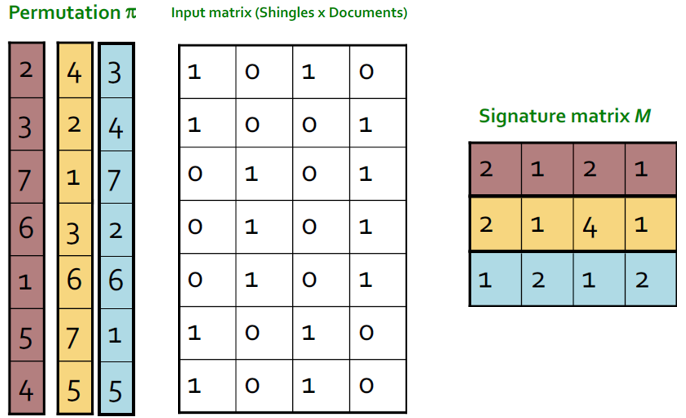

In [ ]:
# don't run this cell.
from IPython.display import Image
Image(filename='lsh.png')

In [ ]:
def create_signature_matrix(minhash_functions, sparse_vector_matrix):
    """

    :param minhash_functions:
    :param sparse_vector_matrix:
    :return: signature matrix
    """
    M = []
    #TODO-Task4: start your code    
    for min_hash in minhash_functions:
        m = []
        for vector in sparse_vector_matrix:
            for i in range(1, len(min_hash)):
                index = min_hash.index(i)
                signature_val = vector[index]
                if signature_val == 1:
                    m.append(i)
                    break
        M.append(m)
    #end your code

    return M

In [ ]:
num_minhash = 20
band_size = 10
K = 5

sentence = ['university of AmirKabir']
documents_shingles = create_shingle(sentence, K)
print('Shingles')
print(documents_shingles)

vocab = set()
for shingle in documents_shingles:
    vocab.update(shingle)
print('Vocab')
print(vocab)

input_matrix = create_sparse_vectors(documents_shingles, vocab)
print('Input matrix')
print(input_matrix)

min_hashes = create_minhash_functions(num_minhash, len(vocab))
print('Min-Hashes')
print(min_hashes)

signature_matrix = create_signature_matrix(min_hashes, input_matrix)
print('Signature-Matrix')
print(signature_matrix)

Shingles
[['unive', 'ersit', 'ty of', 'f Ami', 'irKab']]
Vocab
{'ersit', 'ty of', 'unive', 'f Ami', 'irKab'}
Input matrix
[array([1., 1., 1., 1., 1.])]
Min-Hashes
[[4, 5, 2, 1, 3], [5, 1, 4, 3, 2], [2, 5, 1, 3, 4], [1, 3, 2, 4, 5], [2, 1, 5, 3, 4], [4, 1, 2, 3, 5], [1, 5, 3, 4, 2], [4, 3, 1, 2, 5], [5, 2, 3, 1, 4], [3, 1, 4, 5, 2], [4, 5, 1, 3, 2], [3, 2, 1, 5, 4], [5, 2, 3, 4, 1], [3, 1, 4, 5, 2], [4, 2, 5, 1, 3], [3, 1, 2, 4, 5], [3, 1, 4, 2, 5], [3, 4, 2, 1, 5], [1, 3, 4, 2, 5], [2, 4, 3, 5, 1]]
Signature-Matrix
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


In [ ]:
signature_matrix = create_signature_matrix(min_hashes, input_matrix)
signature_matrix

[[24,
  2,
  1,
  3,
  3,
  2,
  22,
  4,
  28,
  10,
  57,
  26,
  22,
  10,
  4,
  10,
  8,
  28,
  3,
  1,
  10,
  4,
  28,
  11,
  11,
  2,
  3,
  26,
  10,
  13,
  12,
  3,
  4,
  10,
  1,
  28,
  11,
  13,
  10,
  36,
  7,
  18,
  11,
  8,
  10,
  2,
  5,
  3,
  3,
  2,
  22],
 [23,
  3,
  9,
  8,
  13,
  14,
  3,
  5,
  3,
  7,
  36,
  11,
  3,
  19,
  11,
  7,
  18,
  3,
  8,
  13,
  40,
  10,
  3,
  11,
  1,
  14,
  29,
  11,
  40,
  4,
  11,
  8,
  11,
  22,
  9,
  3,
  1,
  10,
  7,
  11,
  13,
  4,
  1,
  18,
  28,
  3,
  11,
  8,
  13,
  14,
  3],
 [17,
  42,
  15,
  5,
  11,
  2,
  31,
  12,
  51,
  6,
  4,
  41,
  31,
  10,
  3,
  9,
  1,
  31,
  5,
  18,
  6,
  1,
  35,
  25,
  31,
  3,
  11,
  41,
  9,
  3,
  3,
  5,
  2,
  9,
  18,
  31,
  39,
  3,
  6,
  34,
  10,
  43,
  31,
  1,
  6,
  42,
  8,
  5,
  11,
  2,
  31],
 [6,
  52,
  9,
  15,
  38,
  18,
  43,
  29,
  13,
  1,
  26,
  8,
  43,
  24,
  3,
  20,
  3,
  45,
  15,
  26,
  24,
  3,
  16,
  19,
  5,
  3,
  2

In [ ]:
def jaccard(a, b):
    """

    :param a:
    :param b:
    :return: Number of common values in a and b
    """
    a = set(a)
    b = set(b)
    result = 0
    #1 - ( (A ۸ B) / (A ۷ B) )
    #TODO-Task5: start your code
    result = 1 - ( len(a.intersection(b)) / len(a.union(b)))
    #end your code
    return result

In [ ]:
t1 = {'a', 'b', 'c'}
t2 = {'a', 'b', 'd'}
assert jaccard(t1, t2) == 0.5, "Task5 faild"
print("task5 successful")

task5 successful


In [ ]:
jaccard(signature_matrix[2], signature_matrix[1])

0.7272727272727273

In [ ]:
def create_bands(signatures, band_size):
    bands = []
    for signature in signatures:
        r = len(signature) // band_size

        sub_bands = []
        for i in range(0, len(signature), r):
            sub_bands.append(signature[i: i + r])
        bands.append(sub_bands)
    return bands

In [ ]:
bands = create_bands(signature_matrix, band_size)
bands

[[[24, 2, 1, 3, 3],
  [2, 22, 4, 28, 10],
  [57, 26, 22, 10, 4],
  [10, 8, 28, 3, 1],
  [10, 4, 28, 11, 11],
  [2, 3, 26, 10, 13],
  [12, 3, 4, 10, 1],
  [28, 11, 13, 10, 36],
  [7, 18, 11, 8, 10],
  [2, 5, 3, 3, 2],
  [22]],
 [[23, 3, 9, 8, 13],
  [14, 3, 5, 3, 7],
  [36, 11, 3, 19, 11],
  [7, 18, 3, 8, 13],
  [40, 10, 3, 11, 1],
  [14, 29, 11, 40, 4],
  [11, 8, 11, 22, 9],
  [3, 1, 10, 7, 11],
  [13, 4, 1, 18, 28],
  [3, 11, 8, 13, 14],
  [3]],
 [[17, 42, 15, 5, 11],
  [2, 31, 12, 51, 6],
  [4, 41, 31, 10, 3],
  [9, 1, 31, 5, 18],
  [6, 1, 35, 25, 31],
  [3, 11, 41, 9, 3],
  [3, 5, 2, 9, 18],
  [31, 39, 3, 6, 34],
  [10, 43, 31, 1, 6],
  [42, 8, 5, 11, 2],
  [31]],
 [[6, 52, 9, 15, 38],
  [18, 43, 29, 13, 1],
  [26, 8, 43, 24, 3],
  [20, 3, 45, 15, 26],
  [24, 3, 16, 19, 5],
  [3, 2, 8, 24, 3],
  [3, 10, 32, 8, 2],
  [16, 5, 2, 20, 14],
  [24, 46, 5, 3, 8],
  [14, 32, 7, 38, 12],
  [30]],
 [[52, 37, 4, 13, 4],
  [22, 1, 8, 11, 9],
  [5, 12, 1, 7, 8],
  [9, 5, 11, 3, 2],
  [7, 5, 11, 

In [ ]:
def get_candidate_pairs(doc_index, bands):
    candidateds_ids = []
    for i in range(len(bands)):
        if i == doc_index:
            continue
        current_band = bands[doc_index]
        target_band = bands[i]
        for current_row, target_row in zip(current_band, target_band):
            if current_row == target_row:
                candidateds_ids.append(i)
                break

    return candidateds_ids

In [ ]:
target_id = 1

In [ ]:
candidates = get_candidate_pairs(target_id, bands)
candidates

[6, 18]

In [ ]:
m = 0
v = []
for i in range(len(bands)):
    c = candidates = get_candidate_pairs(i, bands)
    if len(c) > len(v):
        m = i
        v = c.copy()

print(m)
print(v)

1
[6, 18]


In [ ]:
print("Target sentence")
print(documents[target_id])

Target sentence
The quick brown fox jumps over the lazy dog.


In [ ]:
print("Candidate sentences")
for index in candidates:
    print(documents[index])


Candidate sentences
A brown-colored fox jumps over a dog that is lazy.
A fox that is brown in color jumps over a dog that is not very active.


In [ ]:
def get_topk_similar(trget_id, candidates, k):
    """

    :param trget_id:
    :param candidates:
    :return: k most similar sentences from candidates to target sentence
    """
    result = []
    #TODO-Task6: start your code
    print('Target sentence: ' + documents[trget_id])
    for index in candidates:
        result.append(documents[index])
        if len(result) == k:
            break
    #end your code
    return result

In [ ]:
print('Similar sentences:')
print(get_topk_similar(target_id, candidates, k=5))


Similar sentences:
Target sentence: The quick brown fox jumps over the lazy dog.
['A brown-colored fox jumps over a dog that is lazy.', 'A fox that is brown in color jumps over a dog that is not very active.']
